### Titanic - Machine Learning from Disaster

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df_TFD_guest = df_TFD [['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']] 

#### 1.목표변수 설정 ex)생존여부 목표변수
#### 2.non- null 전처리 필요 (확인이 필요)

In [4]:
df_TFD_guest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
## 전처리 확인필요  : 대상 컬럼에 의한 레코드 삭제 시 데이터셋의 양이 통계적인 분포도에 너무 적지 않은지 고려 
## 최소 50개 이상.
## 날짜가 들어가지 않으면 200~500개 사이면 삭제해도 가능
## 단)날짜가 들어갈 시 , 데이터양이 더 많아야 함 
df_TFD_guest = df_TFD_guest.dropna()
df_TFD_guest.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 타이타닉 데이터로부터의 생존 예측 상관 관계  확인 필요 (스토리)
- 목표변수 : 'Survived' - 분포 언발란스 (연속형: 정규화 확인, 범주형: 밸런스 확인유무) 
- 설명변수:  연속형 범주형 섞어서 7개 이상 
    - PassengerId(int) 
    - Survived(int64)
    - Pclass(int64)
    - SibSp(int64) 
    - Parch (int64) 
    
    - Ticket (object)
    - Name(object)    
    - Sex(object)  
    
    - Cabin (object)
    - Embarked(object)
   
   - Age(float64)
    - Fare (float64)  
    
    - ※ 재발율을 줄이기 위해 조심해야 될 것을 정해야함. 증명은 통계적 수치를 보여주면 됨.

- 분석스토리 : 재발방지를 위해 이런건 줄이고 조심하고 늘려야한다는 스토리 필요

<Axes: xlabel='Survived', ylabel='count'>

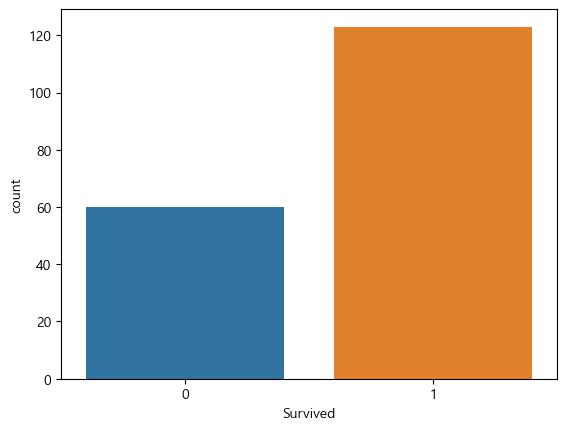

In [6]:
### 데이터 타입과 분포 
## 목표변수 확인 필요 : 대부분 범주형 why? 예측률이 높아야 하기에 분류를 많이 함. 
sns.countplot(data=df_TFD_guest, x= 'Survived')

In [7]:
df_TFD_guest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [8]:
## 성별: 범주형  / 따라서 성별을 int 에서 - object로 변환 필요 
## pclass
df_TFD_guest[['Pclass']] = df_TFD_guest[['Pclass']].astype(object)
df_TFD_guest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    object 
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.6+ KB


In [9]:
guest_list = df_TFD_guest.describe().columns.to_list()
guest_list

['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

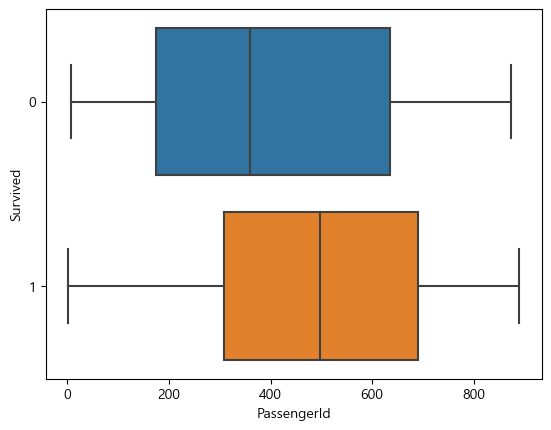

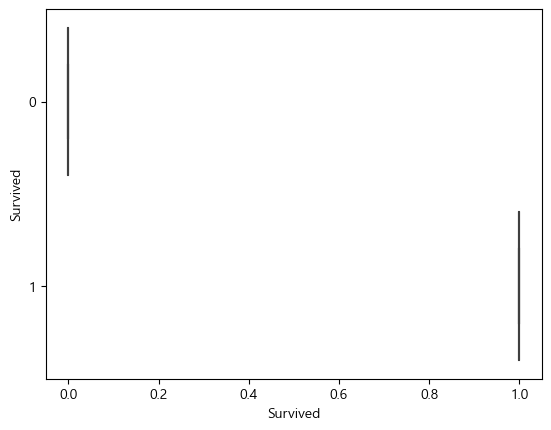

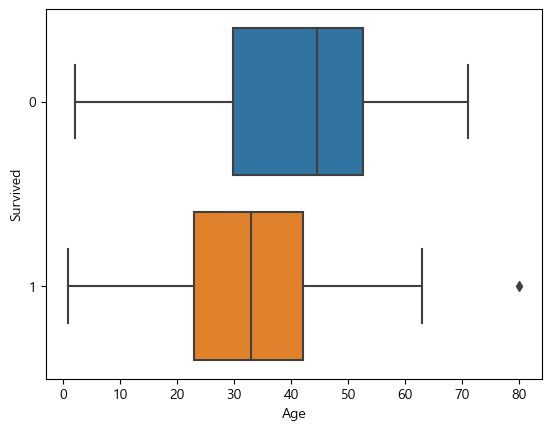

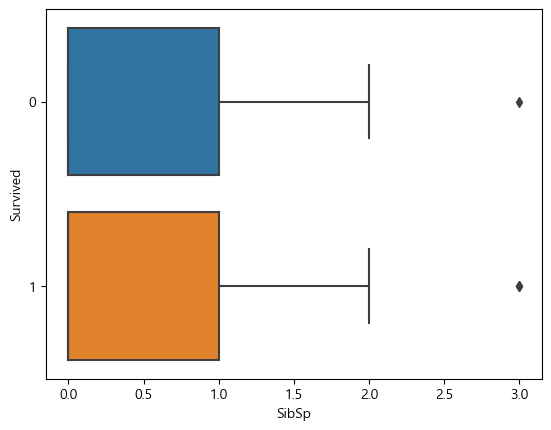

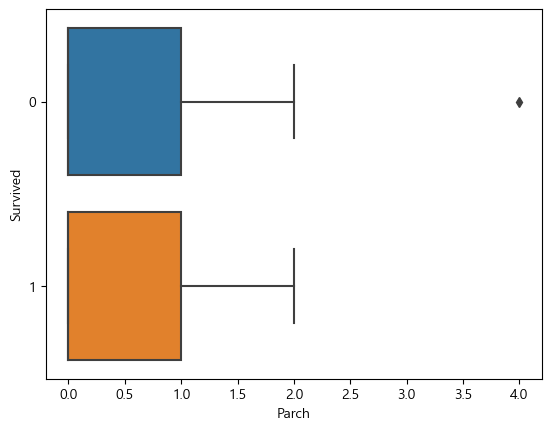

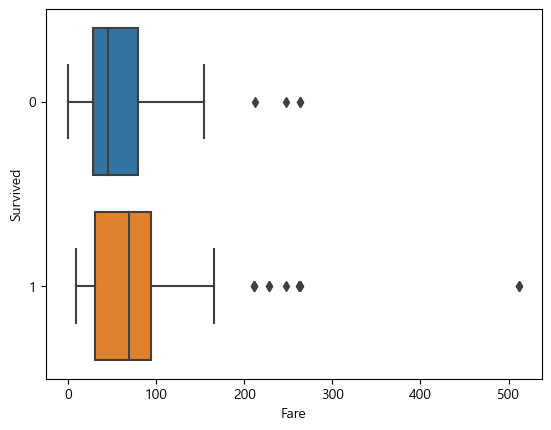

In [10]:
## x:연속형이고/ y가 범주형인 경우, boxplot/barplot으로 그리면 됨 
## ' Survived'  따라 하느냐 안하느냐에 따라 나뉘어져 있음.
# 요약 :  sns.boxplot(data=df_ROS_forpatient, x=item, y='Survived' , orient ='h')
for item in guest_list:
    sns.boxplot(data=df_TFD_guest, x=item, y='Survived', orient ='h')  # $ 기호 없이 item만 사용
    plt.show()

In [12]:
## x: 범주형 / y: 범주형 데이터 분석 
## 단) 재발여부는 출력시킬 필요가 없기에, drop 필요 : 칼럼을 drop 
## 우리가 원하는 것은 objcet type에서만 삭제 해야함. descript로 삭제 하는 것이 더 쉬움
#df_ROS_forpatient.drop(columns=['Survived']) 
guest_list = df_TFD_guest.describe().columns.to_list()
guest_list

['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

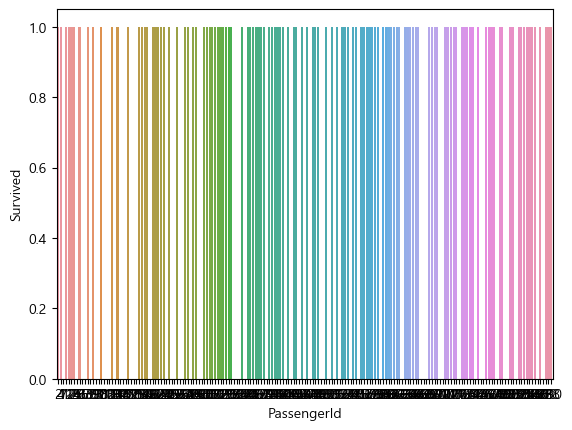

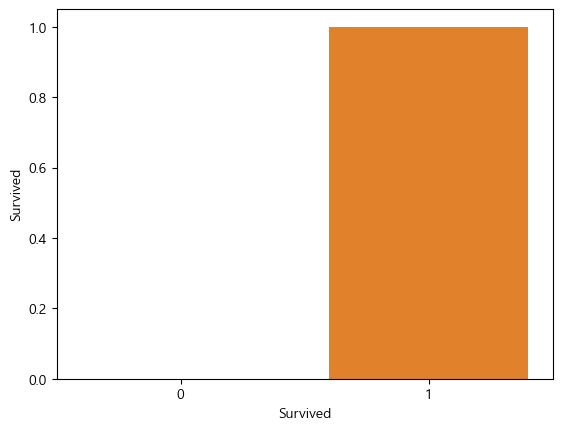

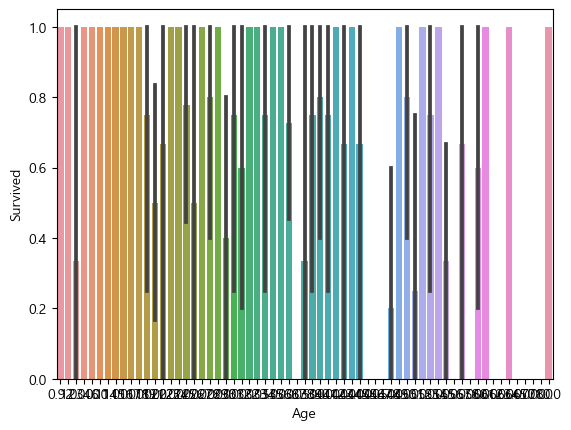

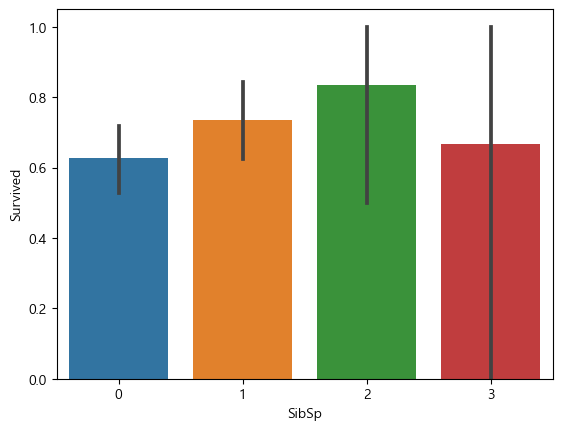

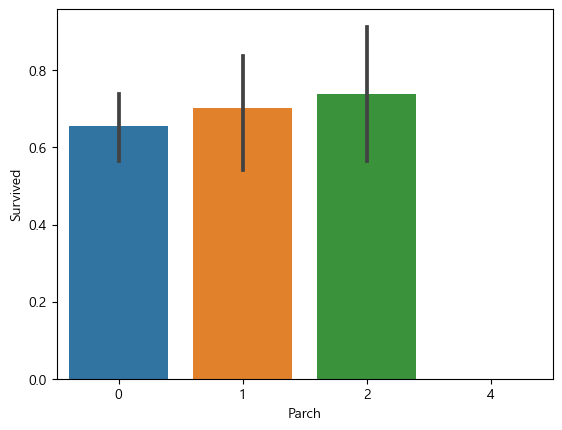

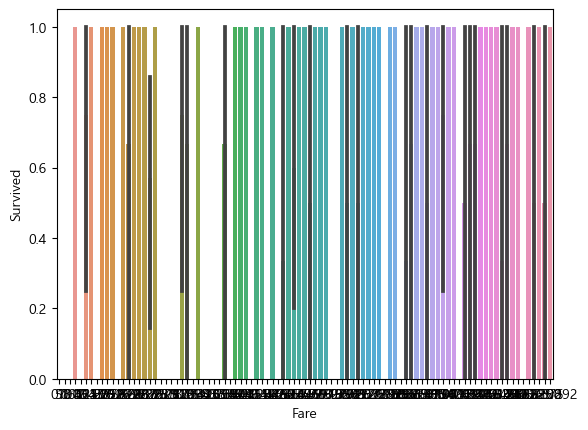

In [13]:
for item in guest_list: 
    sns.barplot(data=df_TFD_guest, x=item, y='Survived')
    plt.show()

In [14]:
df_TFD_guest = df_TFD_guest.dropna()
df_TFD_guest.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df_TFD_guest[['Survived', 'Pclass']] = df_TFD_guest[['Survived', 'Pclass']].astype(object)
df_TFD_guest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    object 
 2   Pclass       183 non-null    object 
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 18.6+ KB


In [18]:
df_TFD_guest_object_list = df_TFD_guest.describe(include=object).columns.to_list()
df_TFD_guest_object_list 

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

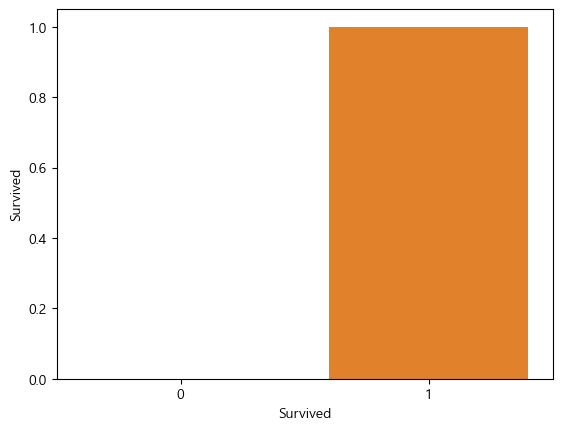

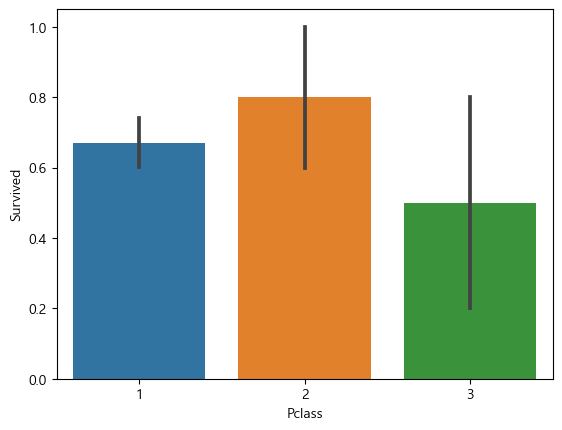

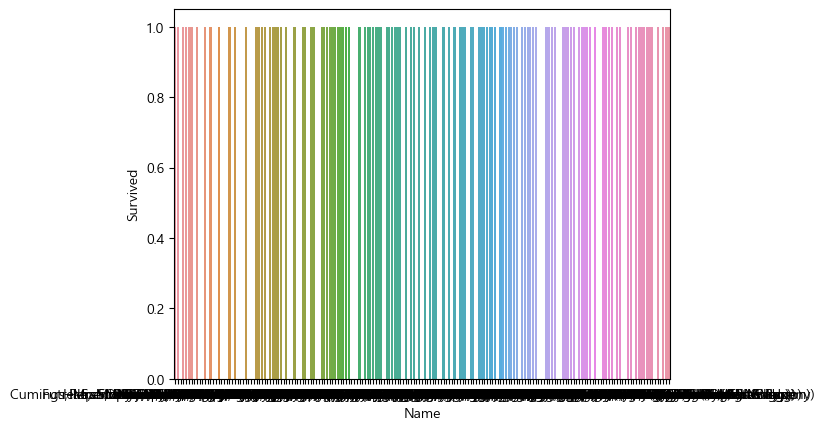

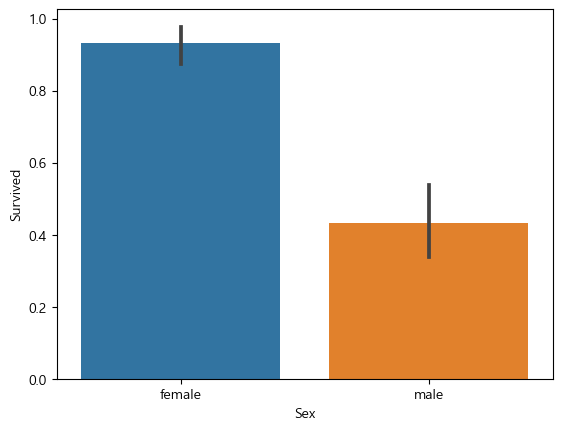

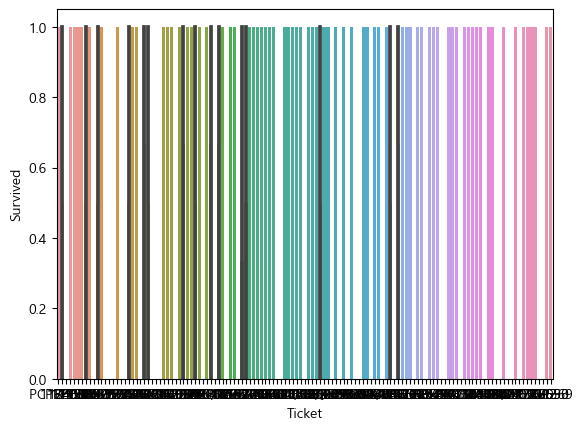

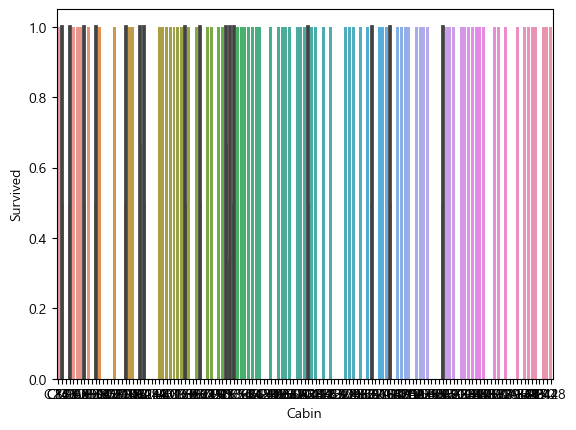

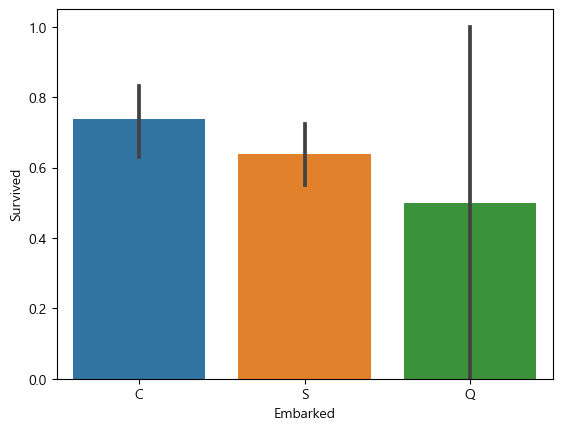

In [19]:
for item in df_TFD_guest_object_list :
    sns.barplot(data=df_TFD_guest, x=item, y='Survived')
    plt.show()